<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Computer_Vision_Noise_Removal_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)
### Computer Vision: Noise Removal 
### Keras Dataset: MNist

### Summary
In this project, a Convolutional Neural Network was created to remove noise from hand written digits. Use of a sequential model would have resulted in accuracies being highly dependent on model architecture as there is loss of spatial information when flattening the input layers. Use of a CNN ensures model stability and a steady decrease in loss. Execution of 100 epochs using a batch size of 128 on Google Colaboratory was completed in approximately 3 seconds per epoch and the elbow around 15 epochs.

+ Training error decreased from 17.86% to 9.42%
+ Test error decreased from 12.91% to 9.37%

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

print(x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


### Data Normalization

In [3]:
# Denormalized
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

# Normalized
X_train = x_train.astype('float32')/255
X_test  = x_test.astype('float32')/255
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0 255
0 255
0.0 1.0
0.0 1.0


### Adding Channels

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### Creating Noisy Images

In [5]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(0.0, 1.0, X_train.shape)
X_test_noisy  = X_test  + noise_factor * np.random.normal(0.0, 1.0, X_test.shape) 

print(X_train_noisy.min(), X_train_noisy.max())
print(X_test_noisy.min(), X_test_noisy.max())

-2.8333777051542275 3.5211106650147794
-2.540173638993445 3.4285028317009125


### Clipping

In [6]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.) 


print(X_train_noisy.min(), X_train_noisy.max())
print(X_test_noisy.min(), X_test_noisy.max())

0.0 1.0
0.0 1.0


### Sampling noisy images

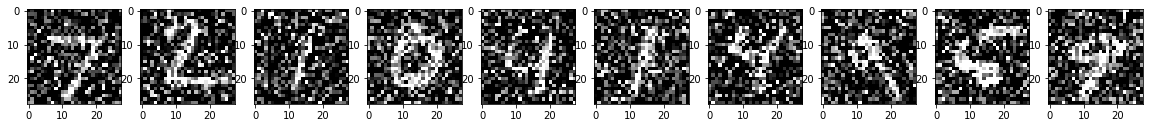

In [7]:
n = 10
plt.figure(figsize = (20, 2))
for i in range(1, n+1):
    sp = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i-1].reshape(28, 28))
    plt.gray()
plt.show()

### Encoder

In [8]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3,3), activation = "relu", padding = "same")(input_img)
x = MaxPool2D((2, 2))(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)

encoded = MaxPool2D((2,2))(x)

### Decoder

In [9]:
x = Conv2D(32, (3,3), activation = "relu", padding = "same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation = "relu", padding = "same")(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation = "sigmoid", padding = "same")(x)

### Compilation

In [10]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adadelta',
                   loss = 'binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Execution: Google CoLaboratory

In [11]:
history = autoencoder.fit(X_train_noisy, X_train, 
                          verbose = 1, 
                          validation_data = (X_test_noisy, X_test), 
                          epochs=100, 
                          batch_size = 128, 
                          shuffle = True) 




Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 17s 287us/step - loss: 0.1786 - val_loss: 0.1291
Epoch 2/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1188 - val_loss: 0.1136
Epoch 3/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1118 - val_loss: 0.1072
Epoch 4/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1079 - val_loss: 0.1039
Epoch 5/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1058 - val_loss: 0.1035
Epoch 6/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1044 - val_loss: 0.1025
Epoch 7/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1032 - val_loss: 0.1005
Epoch 8/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1024 - val_loss: 0.1008
Epoch 9/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1018 - val

### Comparative plots

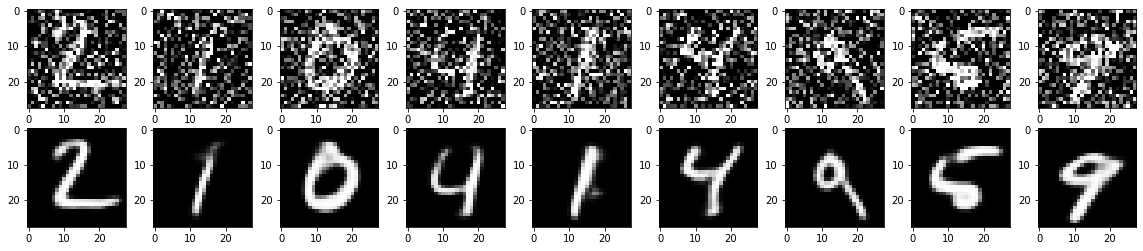

In [12]:
de_noised_images = autoencoder.predict(X_test_noisy[:10])
n = 9
plt.figure(figsize = (20,4))
for i in range(1, n+1):
    plt.subplot(2, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    
    plt.subplot(2, n, n+i) # Move to the next row 
    plt.imshow(de_noised_images[i].reshape(28, 28))
    plt.gray()
plt.show()

### Error plots

Train - Error in prediction went down from 0.1786 to 0.0942
Test  - Error in prediction went down from 0.1291 to 0.0937 



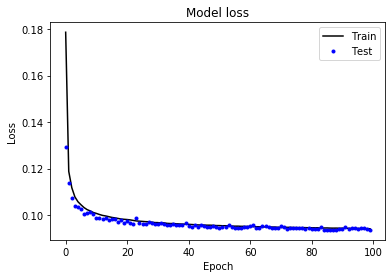

10000/10000 [==============================] - 0s 49us/step


0.09365697883367538

In [19]:
# # Plot training & validation accuracy values
# history.history.keys()

v1 = round(history.history['loss'][0], 4)
v2 = round(history.history['loss'][-1], 4)
v3 = round(history.history['val_loss'][0], 4)
v4 = round(history.history['val_loss'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
autoencoder.evaluate(X_test_noisy, X_test)